In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
my_data_dir="C:\\Users\\USER\\Desktop\\cell_images"

In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_img= imread(para_cell)

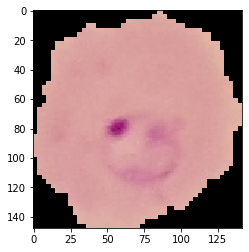

In [10]:
plt.imshow(para_img)

In [11]:
para_img.shape

(148, 142, 3)

In [12]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

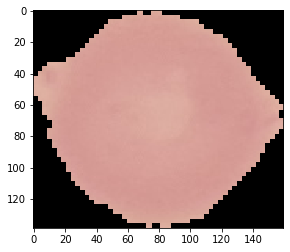

In [13]:
uninfected_cell = train_path+'\\uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_img= imread(uninfected_cell)
plt.imshow(uninfected_img)

In [14]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [15]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [16]:
para_img.shape

(148, 142, 3)

In [17]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

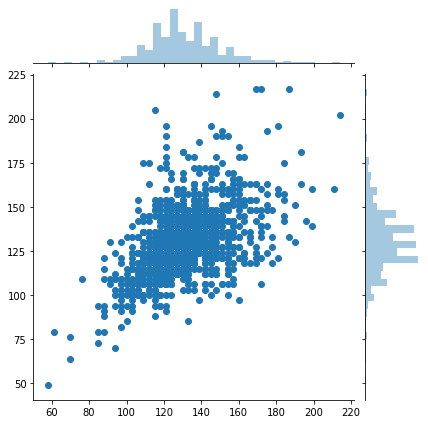

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130,130,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [24]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

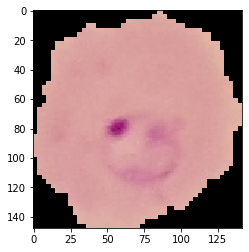

In [25]:
plt.imshow(para_img)

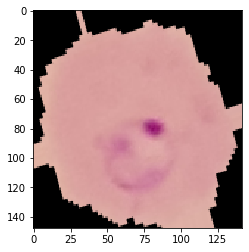

In [26]:
plt.imshow(image_gen.random_transform(para_img))

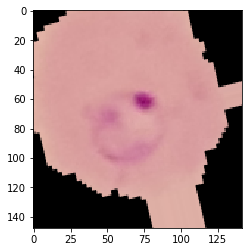

In [27]:
plt.imshow(image_gen.random_transform(para_img))

In [28]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [31]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [36]:
batch_size = 16

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
#results = model.fit_generator(train_image_gen,epochs=20,
#                             validation_data=test_image_gen,
#                             callbacks=[early_stop])

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model=load_model('malaria_detector.h5')

OSError: SavedModel file does not exist at: malaria_detector.h5/{saved_model.pbtxt|saved_model.pb}

In [44]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.6960934565111172, 0.5]

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [47]:
pred_probabilities

array([[0.5636167 ],
       [0.54792446],
       [0.5577791 ],
       ...,
       [0.5444985 ],
       [0.5667378 ],
       [0.5494331 ]], dtype=float32)

In [48]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
predictions = pred_probabilities > 0.5

In [50]:
# Numpy can treat this as True/False for us
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.50      1.00      0.67      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



In [52]:
confusion_matrix(test_image_gen.classes,predictions)

array([[   0, 1300],
       [   0, 1300]], dtype=int64)

In [53]:
para_cell

'C:\\Users\\USER\\Desktop\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
my_image1 = image.load_img(para_cell,target_size=image_shape)  #input 
my_image = image.load_img(para_cell,target_size=image_shape)  #input 

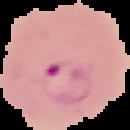

In [56]:
my_image

In [57]:
type(my_image)

PIL.Image.Image

In [58]:
my_image = image.img_to_array(my_image)

In [59]:
type(my_image)

numpy.ndarray

In [60]:
my_image.shape

(130, 130, 3)

In [61]:
my_image = np.expand_dims(my_image, axis=0)

In [62]:
my_image.shape

(1, 130, 130, 3)

In [63]:
s=model.predict(my_image)

In [64]:
print(s)

[[1.]]


In [65]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [66]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Uninfected


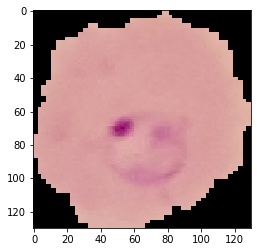

In [67]:
if(s==[[1.]]):
    print("Uninfected")
else:
    print("Parasitized")
plt.imshow(my_image1)

In [71]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog

 
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        #self.wm_iconbitmap('icon.ico')
        root = Tk()
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
 
        self.button()
      #  self.label = ttk.Label(self.labelFrame, text = "hi")
        self.button1()
        outputSection = LabelFrame(self,text="output Fields")

        classLabel = ttk.Label(outputSection,text="Predicted Class").grid(row=2,column=0)
        classEntry = ttk.Entry(outputSection,width=20)
        classEntry.grid(row=2,column=2,padx=40,pady=40)

 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
 
 
    def fileDialog(self):
 
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    def get_prediction(self):
        s=model.predict(my_image)
        #classEntry.configure(state='normal')
        if(s==[[1.]]):
            classEntry.insert(0,"non parasitic")
        else:
            classEntry.insert(0,"parasitic")

        classEntry.configure(state='disabled')



 
 
root = Root()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-71-4097510a2d44>", line 48, in get_prediction
    classEntry.insert(0,"non parasitic")
NameError: name 'classEntry' is not defined


In [74]:
from tkinter import *
from PIL import ImageTk,Image

root = Tk()
root.title('Learn To Code at Codemy.com')

TOPPINGS = [
    ("Pepperoni", "Pepperoni"),
    ("Cheese", "Cheese"),
    ("Mushroom", "Mushroom"),
    ("Onion", "Onion"),
]

pizza = StringVar()
pizza.set("Pepperoni")

for text, topping in TOPPINGS:
    Radiobutton(root, text=text, variable=pizza, value=topping).pack(anchor=W)


def clicked(value):
    myLabel = Label(root, text=value)
    myLabel.pack()

#Radiobutton(root, text="Option 1", variable=r, value=1, command=lambda: clicked(r.get())).pack()
#Radiobutton(root, text="Option 2", variable=r, value=2, command=lambda: clicked(r.get())).pack()

#myLabel = Label(root, text=pizza.get())
#myLabel.pack()

myButton = Button(root, text="Click Me!", command=lambda: clicked(pizza.get()))
myButton.pack()
mainloop()

In [84]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import ImageTk,Image

root = Tk()
root.title('Malaria Parasite Classification System')

OPTIONS = [
    ("CNN", "CNN"),
    ("Bins Approach", "Bins Approach"),
]

x = StringVar()
x.set("CNN")

for text, j in OPTIONS:
    Radiobutton(root, text=text, variable=x, value=j).pack(anchor=W)
    
def clicked(value):
    myLabel = Label(root, text=value)
    myLabel.pack()
    
myButton = Button(root, text="Select", command=lambda: clicked(x.get()))
myButton.pack()
mainloop()

self.title("Malaria Parasite Classification")
self.minsize(640, 400)
#self.wm_iconbitmap('icon.ico')
root = Tk()
self.labelFrame = ttk.LabelFrame(self, text = "Open File")
self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
self.button()
#self.label = ttk.Label(self.labelFrame, text = "hi")
self.button1()
outputSection = LabelFrame(self,text="output Fields")
classLabel = ttk.Label(outputSection,text="Predicted Class").grid(row=2,column=0)
classEntry = ttk.Entry(outputSection,width=20)
classEntry.grid(row=2,column=2,padx=40,pady=40)

def button(self):
    self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
    self.button.grid(column = 1, row = 1)
 
 
def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
def get_prediction(self):
        s=model.predict(my_image)
        #classEntry.configure(state='normal')
        if(s==[[1.]]):
            classEntry.insert(0,"non parasitic")
        else:
            classEntry.insert(0,"parasitic")

        classEntry.configure(state='disabled')



 
 
root = Root()
root.mainloop()

NameError: name 'self' is not defined